## Stacking/Unstacking


### Stack/Unstack

In fact pivoting a table is a special case of stacking a DataFrame. Let us assume we have a DataFrame with MultiIndices on the rows and columns. Stacking a DataFrame means moving (also rotating or pivoting) the innermost column index to become the innermost row index. The inverse operation is called unstacking. It means moving the innermost row index to become the innermost column index. The following diagram depicts the operations:

Stack/unstack
In this example, we look at a DataFrame with 2-level hierarchical indices on both axes. Stacking takes the most-inner column index (i.e. c00, c01, c10), makes it the most inner row index and reshuffles the cell values accordingly. Inversely, unstacking moves the most-inner row indices (i.e. r00, r01) to the columns.

Typically, stacking makes the DataFrame taller, as it is “stacking” data in fewer columns and more rows. Similarly, unstacking usually makes it shorter and wider or broader. The following reproduces the example:

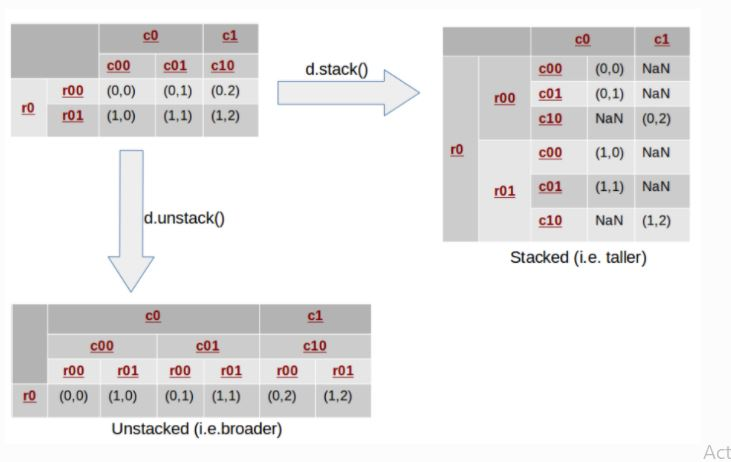

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('stocks.xlsx')

In [3]:
df

,Unnamed: 0,Price,Unnamed: 2,Unnamed: 3,Price to earnings ratio (P/E),Unnamed: 5,Unnamed: 6
0,Company,Facebook,Google,Microsoft,Facebook,Google,Microsoft
1,2017-06-05 00:00:00,155,955,66,37.1,32,30.31
2,2017-06-06 00:00:00,150,987,69,36.98,31.3,30.56
3,2017-06-07 00:00:00,153,963,62,36.78,31.7,30.46
4,2017-06-08 00:00:00,155,1000,61,36.11,31.2,30.11
5,2017-06-09 00:00:00,156,1012,66,37.07,30,31


In [4]:
## here it is givinh unnamed because we have not provided index and header

In [5]:
df = pd.read_excel('stocks.xlsx', header=(0,1))

In [6]:
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [7]:
df.stack()

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [8]:
df.stack(level=0)

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [11]:
df1=df.stack(level=1)

In [12]:
df1

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [13]:
df1.unstack()

Price                            Price to earnings ratio (P/E)           \
  Company Facebook  Google Microsoft                       Company Facebook   
0     NaN    155.0   955.0      66.0                           NaN    37.10   
1     NaN    150.0   987.0      69.0                           NaN    36.98   
2     NaN    153.0   963.0      62.0                           NaN    36.78   
3     NaN    155.0  1000.0      61.0                           NaN    36.11   
4     NaN    156.0  1012.0      66.0                           NaN    37.07   

                   Unnamed: 0_level_0                            
  Google Microsoft            Company Facebook Google Microsoft  
0   32.0     30.31         2017-06-05      NaT    NaT       NaT  
1   31.3     30.56         2017-06-06      NaT    NaT       NaT  
2   31.7     30.46         2017-06-07      NaT    NaT       NaT  
3   31.2     30.11         2017-06-08      NaT    NaT       NaT  
4   30.0     31.00         2017-06-09      NaT    NaT       NaT

In [15]:
df2 = pd.read_excel('stocks_3_levels.xlsx', header=(0,1,2))

In [16]:
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [18]:
df2.stack()

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [19]:
df2.stack(level=0)

Net Profit                  Net Sales                   \
                       Facebook Google Microsoft  Facebook Google Microsoft   
0 Income Statement         0.80   5.43      4.56       2.6   20.0     18.70   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
1 Income Statement         0.97   5.89      5.10       3.1   22.0     21.30   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
2 Income Statement         1.20   6.10      5.43       4.3   24.0     21.45   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
3 Income Statement         1.67   6.50      5.89       6.7   26.0     21.88   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
4 Income Statement         2.03   6.40      6.09       8.1   31.0     22.34   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   

                        Price                   Price to earnings ratio (P/E)  \
                     Facebook  Google Microsoft                      Facebook   
0 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0   955.0      66.0                         37.10   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
1 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          150.0   987.0      69.0                         36.98   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
2 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          153.0   963.0      62.0                         36.78   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
3 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0  1000.0      61.0                         36.11   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
4 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          156.0  1012.0      66.0                         37.07   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   

                                      Unnamed: 0_level_1  
                     Google Microsoft            Company  
0 Income Statement      NaN       NaN                NaN  
  Price Ratios         32.0     30.31                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2016  
1 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.3     30.56                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q2 2016  
2 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.7     30.46                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q3 2016  
3 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.2     30.11                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q4 2016  
4 Income Statement      NaN       NaN                NaN  
  Price Ratios         30.0     31.00                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2017